In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error, mean_squared_error

sns.set_style("darkgrid")

%matplotlib inline

In [39]:
df = pd.read_csv(
    '/content/drive/MyDrive/VKR_DS_2023/отчеты по продажам_csv/Период отчета_01.01.2018_31.12.2022_раздел.csv',
    index_col = [0],
    parse_dates = [0],
    dayfirst = True)

In [40]:
df_sales = df.copy()
print(df_sales.shape)
df_sales.head()

(4102457, 8)


,Shop,Nomenclature_group,Nomenclature,Quantity_sold,Cost_price,Revenue,Profit,Profit_percent
Date,,,,,,,,
2018-01-02,(закрыт) ЭНЕРГЕТИКОВ,Арматура для унитаза,"Механизм впускной 1/2 боковой ALCAPLAST А-15,",1,251,452,201,79.78
2018-01-02,(закрыт) ЭНЕРГЕТИКОВ,"Канализация, сифоны, гофры",Клапан Bonomini обратный для стиральной машины...,1,146,224,78,53.30
2018-01-02,(закрыт) ЭНЕРГЕТИКОВ,Смесители,Смеситель для ванны MOFEM Треф 603 TREFF CER ...,1,3605,5488,1883,52.25
2018-01-02,БАЙКОНУРСКАЯ,Арматура для унитаза,"Механизм впускной 1/2 нижний ALCAPLAST А-17 , ...",1,290,534,244,84.27
2018-01-02,БАЙКОНУРСКАЯ,Воздухоотводчики,"Кран воздушный КВ-1, 3/4""",4,119,252,133,111.71


In [4]:
df_sales.isna().sum()

Shop                  11
Nomenclature_group     3
Nomenclature           0
Quantity_sold          0
Cost_price             0
Revenue                0
Profit                 0
Profit_percent         0
dtype: int64

In [5]:
df_sales.describe()

,Quantity_sold,Cost_price,Revenue,Profit,Profit_percent
count,4.102457e+06,4.102457e+06,4.102457e+06,4.102457e+06,4.102457e+06
mean,4.054585e+00,6.475682e+02,9.200173e+02,2.724711e+02,1.558719e+02
std,1.749061e+01,2.591071e+03,4.266126e+03,2.423863e+03,1.173645e+04
min,-1.500000e+03,-2.038840e+05,-6.529940e+05,-6.529940e+05,-1.932130e+03
25%,1.000000e+00,5.900000e+01,1.040000e+02,4.200000e+01,5.674000e+01
50%,2.000000e+00,1.700000e+02,2.920000e+02,1.170000e+02,7.065000e+01
75%,4.000000e+00,4.710000e+02,7.950000e+02,3.150000e+02,8.667000e+01
max,1.200000e+04,1.168608e+06,1.579200e+06,4.127990e+05,4.999900e+06


In [6]:
df_sales['Nomenclature'].value_counts().head(10)

Услуги по оформлению документов,                        35505
Пакет п/э (40*60),                                      32742
Ниппель , Диаметр: 1/2                                  26057
Отвод Ostendorf, 50мм х 45°                             21992
Отвод Ostendorf, 50мм х 87°                             21612
Труба металлопластиковая HENCO Стандарт, Диаметр: 16    21555
Труба фановая Ostendorf, 50мм х 500мм                   19788
Гофра Jimten A-103, Диаметр: 1-1/2, Размер: 50          19308
Труба фановая Ostendorf, 50мм х 1000мм                  17844
Труба металлопластиковая HENCO Стандарт, Диаметр: 20    16459
Name: Nomenclature, dtype: int64

In [7]:
df_sales['Shop'].value_counts().head(10)

ГАГАРИНА              315729
ВЫБОРГСКОЕ ШОССЕ      288133
В О 15 линия, д.72    285925
ЛЕНИНА                237012
ВСЕВОЛОЖСК            236860
ПУШКИН                210113
ОБУХОВСКОЙ_ОБОРОНЫ    208536
РАЗЪЕЗЖАЯ             207698
РУДНЕВА               195030
ЛАНСКОЕ               190185
Name: Shop, dtype: int64

In [8]:
# берем продажи одной товарной позиции

df_sales = df_sales.loc[df_sales['Shop'] == 'ГАГАРИНА']
df_sales = df_sales.loc[df_sales['Nomenclature'] == 'Отвод Ostendorf, 50мм х 45°']
print(df_sales.shape)
df_sales.head()

(1368, 8)


,Shop,Nomenclature_group,Nomenclature,Quantity_sold,Cost_price,Revenue,Profit,Profit_percent
Date,,,,,,,,
2018-01-03,ГАГАРИНА,Канализация,"Отвод Ostendorf, 50мм х 45°",1,13,18,5,40.74
2018-01-09,ГАГАРИНА,Канализация,"Отвод Ostendorf, 50мм х 45°",8,100,132,32,31.55
2018-01-11,ГАГАРИНА,Канализация,"Отвод Ostendorf, 50мм х 45°",1,13,20,7,59.94
2018-01-12,ГАГАРИНА,Канализация,"Отвод Ostendorf, 50мм х 45°",10,125,166,41,32.75
2018-01-13,ГАГАРИНА,Канализация,"Отвод Ostendorf, 50мм х 45°",8,100,134,34,33.55


In [41]:
# изменяем шаг временного ряда, берем сумму (sum) или среднее (mean) за неделю

df_sales = df_sales.resample('W').sum()
df_sales = df_sales[['Profit']]
print(df_sales.shape)
df_sales.head()

(261, 1)


<ipython-input-41-1f49fa1587d3>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sales = df_sales.resample('W').sum()


,Profit
Date,
2018-01-07,805551
2018-01-14,1997174
2018-01-21,2566781
2018-01-28,2894793
2018-02-04,3019153


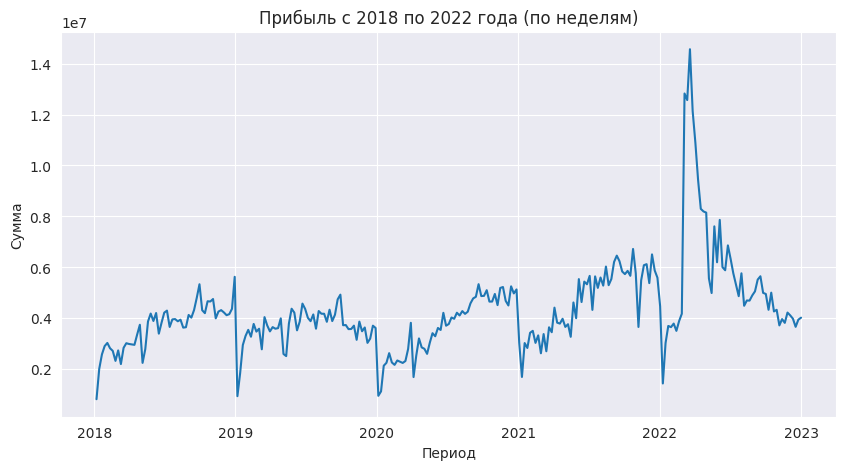

In [42]:
plt.figure(figsize=(10,5))
plt.plot(df_sales)
plt.title('Прибыль с 2018 по 2022 года (по неделям)')
plt.xlabel('Период')
plt.ylabel('Сумма')
plt.show()

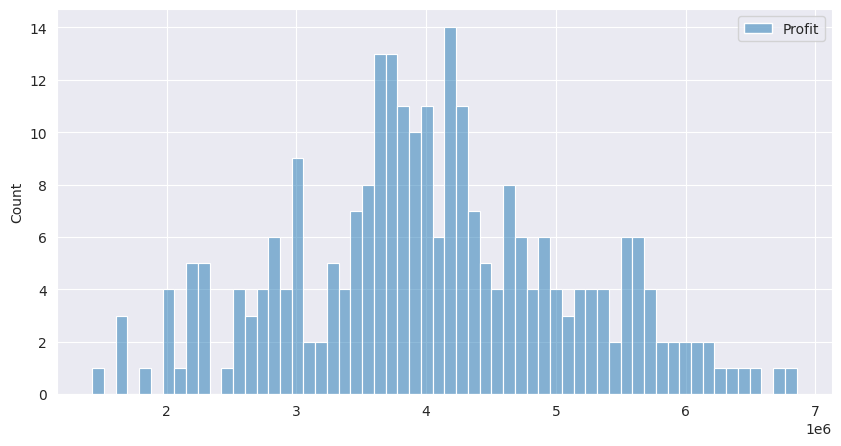

In [17]:
plt.figure(figsize=(10,5))
sns.histplot(df_sales, bins = 60)
plt.show()

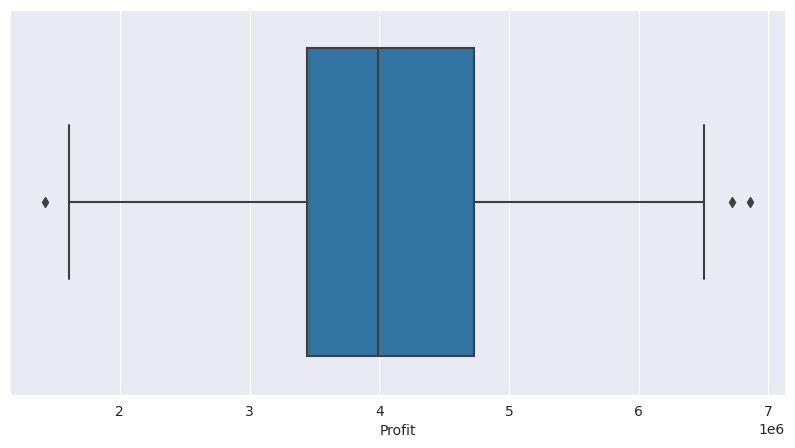

In [16]:
plt.figure(figsize=(10,5))
sns.boxplot(x = df_sales.Profit)
plt.show()

In [15]:
# заменяем выбросы средним значением

Q1 = df_sales['Profit'].quantile(0.25)
Q3 = df_sales['Profit'].quantile(0.75)
IQR = Q3 - Q1
df_Q1 = np.array(df_sales[(df_sales['Profit'] < Q1-1.5*IQR )])
df_Q3 = np.array(df_sales[(df_sales['Profit'] > Q3+1.5*IQR )])

df_2018 = df_sales['2018':'2018']['Profit']
df_2019 = df_sales['2019':'2019']['Profit']
df_2020 = df_sales['2020':'2020']['Profit']
df_2021 = df_sales['2021':'2021']['Profit']
df_2022 = df_sales['2022':'2022']['Profit']

for i in range(len(df_sales)):
    if (df_sales.values[i] == df_Q1).any() or (df_sales.values[i] == df_Q3).any():
        index = (df_sales.index[i])
        df_list = [df_2018[(df_sales.index[i].week)-1],
                   df_2019[(df_sales.index[i].week)-1],
                   df_2020[(df_sales.index[i].week)-1],
                   df_2021[(df_sales.index[i].week)-1],
                   df_2022[(df_sales.index[i].week)-1]]

        df_sales[index:index] = np.mean(df_list) 
        print(df_sales[index:index])

               Profit
Date                 
2018-01-07  2029539.4
               Profit
Date                 
2019-01-06  2029539.4
               Profit
Date                 
2020-01-05  2029539.4
               Profit
Date                 
2020-01-12  1608596.2
               Profit
Date                 
2022-03-06  3073006.4
               Profit
Date                 
2022-03-13  4677540.4
               Profit
Date                 
2022-03-20  4887235.2
               Profit
Date                 
2022-03-27  5541434.8
               Profit
Date                 
2022-04-03  5168568.2
               Profit
Date                 
2022-04-10  4717068.6
               Profit
Date                 
2022-04-17  4458973.0
               Profit
Date                 
2022-04-24  4443911.2
               Profit
Date                 
2022-05-01  4545564.4
               Profit
Date                 
2022-05-22  3782479.2
               Profit
Date                 
2022-06-05  4312715.2


#Скользящее среднее

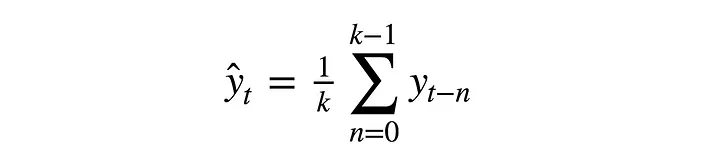

In [ ]:
def moving_average(series, n):
    #вычисляем среднее значение последних n наблюдений
    return np.average(series[-n:])

moving_average(df_sales, 3)

3866617.0

In [ ]:
def plot_Moving_Average(series, window, scale = 1.96):
    
    # series - данные с временными рядами
    # window - размер скользящего окна

    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize = (10,5))
    plt.title('Скользящее среднее\n размер окна = {}'.format(window))
    plt.plot(rolling_mean, 'g', label = 'Тенденция скользящего среднего')

    plt.plot(series[window:], label='Фактические значения')
    plt.legend()

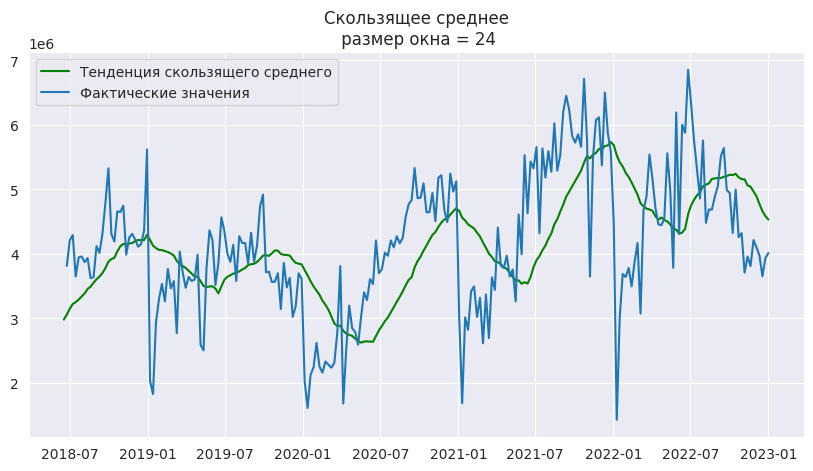

In [ ]:
plot_Moving_Average(df_sales, 24)

#Средневзвешенное

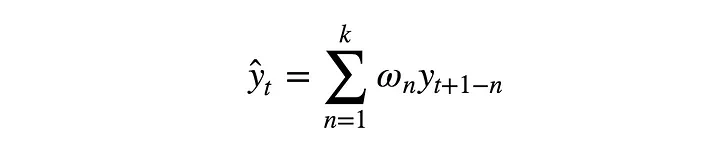

In [ ]:
def weighted_average(series, weights):
    # вычисляем средевзвешенное значение последних nn значений временного ряда
    result = 0.0
    weights.reverse()
    for n in range(len(weights)):
        result += series.iloc[-n-1] * weights[n]
    return float(result)

weighted_average(df_sales, [0.6, 0.3, 0.1])

3773226.8

#Экспоненциальное сглаживание

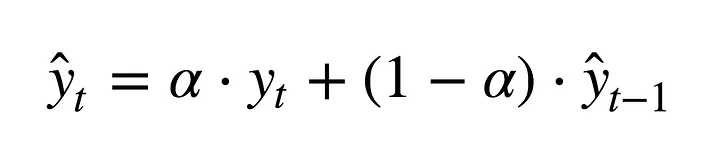

In [ ]:
def exponential_smoothing(series, alpha):
    # alpha - коэффициент сглаживания

    result = [series[0]] # первое значение совпадает с исходными данными
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

def plot_exponential_smoothing(series, alphas):

    # график экспоненциального сглаживания с различными коэффициентами
    # alphas - список коэффициентов сглаживания

    plt.figure(figsize = (10,5))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label = 'Alpha {}'.format(alpha))
    plt.plot(series.values, 'c', label = 'Actual')
    plt.legend(loc = 'best')
    plt.title('Экспоненциальное сглаживание')
    plt.show()

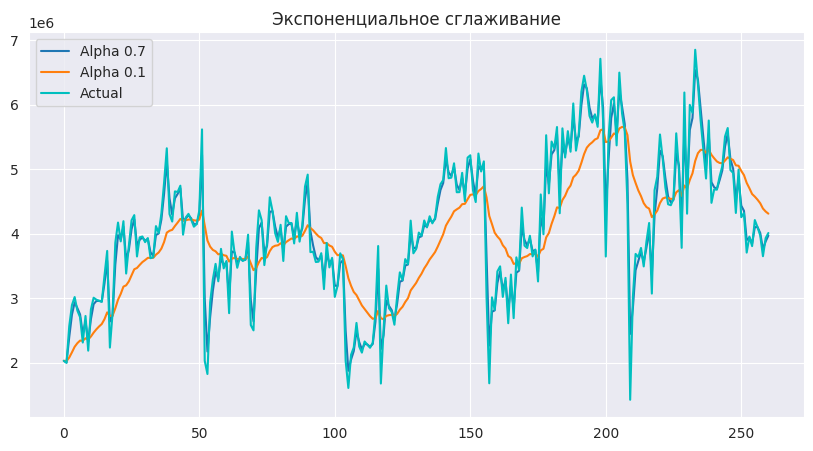

In [ ]:
plot_exponential_smoothing(df_sales.Profit, [0.7, 0.1])

In [ ]:
# добавим кривую сглаживаия в качестве столбца в датафрейм
df_pred = df_sales.copy()
df_pred['exp_smoothing'] = exponential_smoothing(df_pred.Profit, 0.7)

In [ ]:
# импортируем класс timedelta
from datetime import timedelta
 
# возьмём последний индекс (последняя неделя 2022 года)
last_date = df_pred.iloc[[-1]].index
 
# "прибавим" одну неделю
last_date = last_date + timedelta(weeks = 1)
last_date
 
# добавим его в датафрейм
df_pred = df_pred.append(pd.DataFrame(index = last_date))
 
# значения за эту неделю останутся пустыми
df_pred.tail()

<ipython-input-19-9895a2ba3a6d>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_pred = df_pred.append(pd.DataFrame(index = last_date))


,Profit,exp_smoothing
Date,,
2022-12-11,3973320.0,4.012453e+06
2022-12-18,3652897.0,3.760764e+06
2022-12-25,3933966.0,3.882005e+06
2023-01-01,4012988.0,3.973693e+06
2023-01-08,NaN,NaN


In [ ]:
# сдвигаем второй столбец
df_pred['exp_smoothing'] = df_pred['exp_smoothing'].shift(1)

In [ ]:
# как и должно быть первое прогнозное значение совпадает с предыдущим фактическим
df_pred.head()

,Profit,exp_smoothing
Date,,
2018-01-07,2029539.4,NaN
2018-01-14,1997174.0,2.029539e+06
2018-01-21,2566781.0,2.006884e+06
2018-01-28,2894793.0,2.398812e+06
2018-02-04,3019153.0,2.745999e+06


In [ ]:
# и у нас есть прогноз на одну неделю вперед
df_pred.tail()

,Profit,exp_smoothing
Date,,
2022-12-11,3973320.0,4.103764e+06
2022-12-18,3652897.0,4.012453e+06
2022-12-25,3933966.0,3.760764e+06
2023-01-01,4012988.0,3.882005e+06
2023-01-08,NaN,3.973693e+06


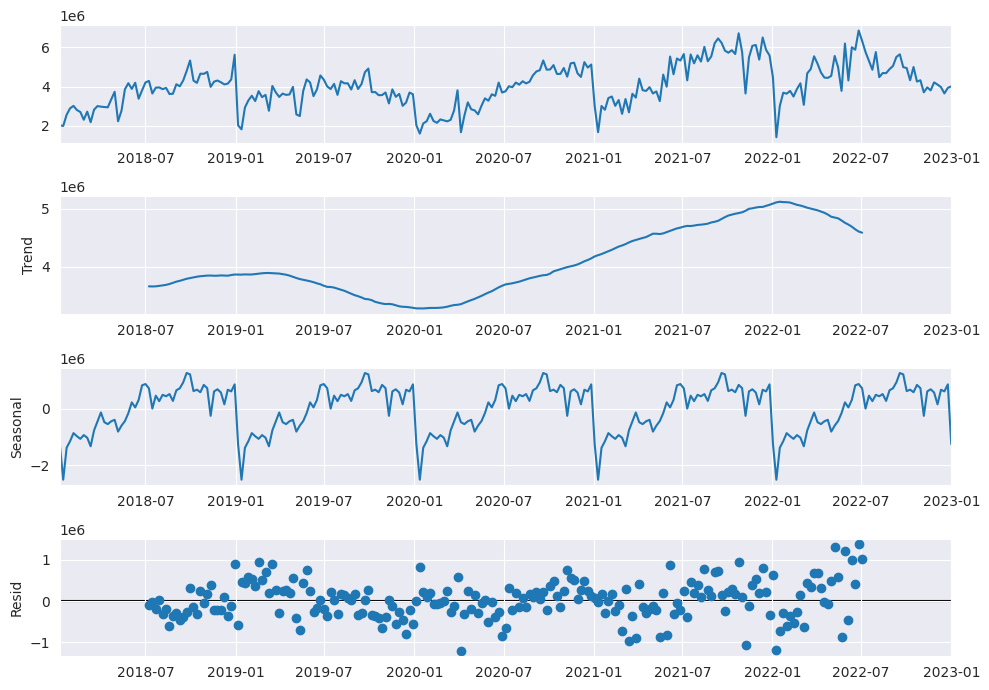

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# задаем размер графика
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7
 
# применяем функцию к данным о перевозках
decompose = seasonal_decompose(df_sales)
decompose.plot()
 
plt.show()

In [ ]:
trainsplit = len(df_sales) - 24

train_df = df_sales[:trainsplit]
test_df = df_sales[trainsplit:]

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


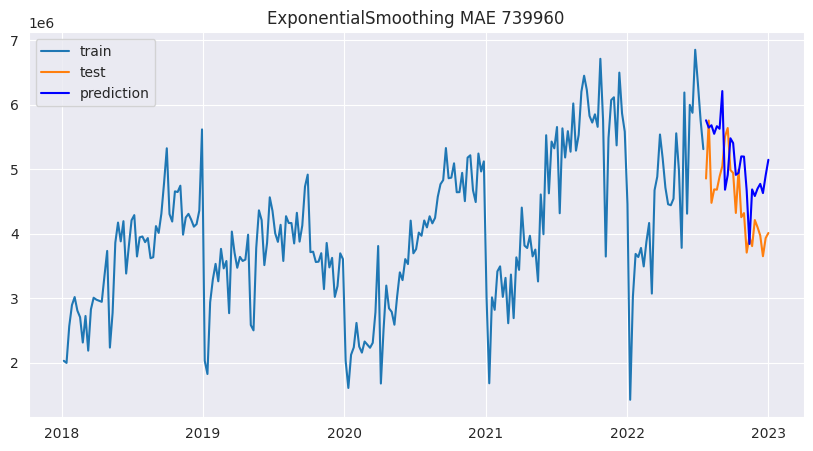

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

holt_model = ExponentialSmoothing(train_df['Profit'], trend = 'add', seasonal = 'add', seasonal_periods = 12*4).fit()

holt_pred = holt_model.forecast(24)

plt.figure(figsize=(10,5))
plt.plot(train_df['Profit'], label = 'train')
plt.plot(test_df['Profit'], label = 'test')
plt.plot(holt_pred, color='b', label = 'prediction')

error = mean_absolute_error(holt_pred, test_df)
plt.title("ExponentialSmoothing MAE {0:.0f}".format(error))
plt.legend()
plt.show()

#LinearRegression


In [19]:
def prepareData(data, lag_start=1, lag_end=4, test_size=0.1):

    data = pd.DataFrame(data.copy())
    data.columns = ["y"]

    # считаем индекс в датафрейме, после которого начинается тестовыый отрезок
    test_index = int(len(data)*(1-test_size))

    # добавляем лаги исходного ряда в качестве признаков
    for i in range(lag_start, lag_end):
        data["lag_{}".format(i)] = data.y.shift(i)

    y = data.dropna().y
    X = data.dropna().drop(['y'], axis=1)

    # разбиваем весь датасет на тренировочную и тестовую выборку
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]

    return X_train, X_test, y_train, y_test

In [20]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = prepareData(df_sales, lag_start=1, lag_end=7, test_size=0.1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

df_lr_pred = pd.DataFrame(data=y_test)
df_lr_pred['prediction'] = lr_pred
print(df_lr_pred.shape)
df_lr_pred.sample(5).round()

(234, 6) (21, 6) (234,) (21,)
(21, 2)


,y,prediction
Date,,
2022-10-30,4321700.0,4483517.0
2022-08-14,4689519.0,4805741.0
2022-08-21,4685013.0,4663059.0
2022-10-09,4323874.0,4955383.0
2022-11-27,4213777.0,3966448.0


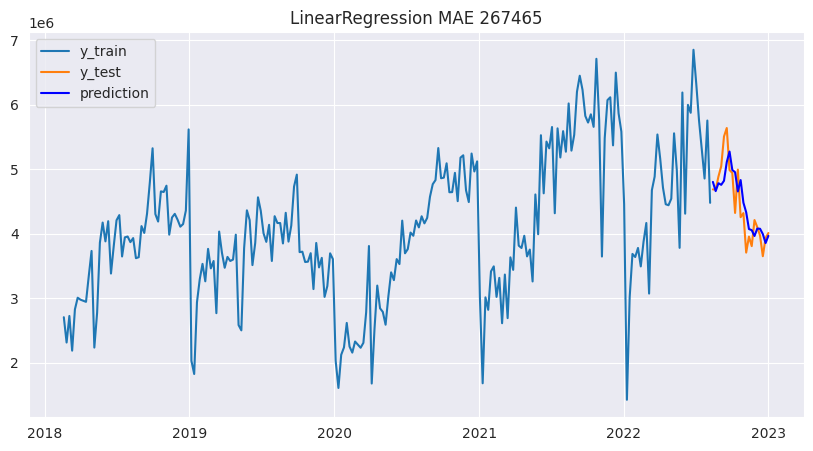

In [21]:
plt.figure(figsize=(10,5))
plt.plot(y_train, label='y_train')
plt.plot(df_lr_pred['y'], label='y_test')
plt.plot(df_lr_pred['prediction'], color='b', label='prediction')
    
error = mean_absolute_error(df_lr_pred['prediction'], df_lr_pred['y'])
plt.title("LinearRegression MAE {0:.0f}".format(error))
plt.legend(loc="best")
plt.show()

In [22]:
print(mean_absolute_error(df_lr_pred['y'], df_lr_pred['prediction']))
print(mean_squared_error(df_lr_pred['y'], df_lr_pred['prediction']))
print(r2_score(df_lr_pred['y'], df_lr_pred['prediction']))

267464.57496146346
118122301582.95184
0.6356553481887968


#RandomForestRegressor

In [23]:
from sklearn.ensemble import RandomForestRegressor

base_rf = RandomForestRegressor(max_depth=3, random_state=42)
base_rf.fit(X_train, y_train)

pred_rf = base_rf.predict(X_test)

In [24]:
df_rf = pd.DataFrame(data=y_test)
df_rf['prediction'] = pred_rf
df_rf.sample(5).round()

,y,prediction
Date,,
2022-08-21,4685013.0,5152072.0
2022-10-09,4323874.0,5043914.0
2022-11-13,3957250.0,3938936.0
2022-10-16,4996696.0,4552989.0
2022-12-18,3652897.0,3990740.0


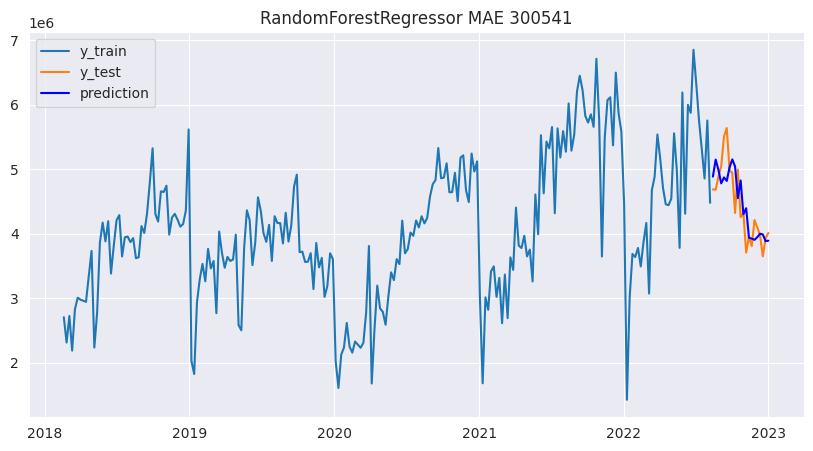

In [25]:
plt.figure(figsize=(10,5))
plt.plot(y_train, label='y_train')
plt.plot(df_rf['y'], label='y_test')
plt.plot(df_rf['prediction'], color='b', label='prediction')
    
error = mean_absolute_error(df_rf['prediction'], df_rf['y'])
plt.title("RandomForestRegressor MAE {0:.0f}".format(error))
plt.legend(loc="best")
plt.show()

In [26]:
from pprint import pprint
print('параметры по умолчанию:\n')
pprint(base_rf.get_params())

параметры по умолчанию:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [27]:
from sklearn.model_selection import RandomizedSearchCV
# количество деревьев в случайном лесу 
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)] 
# количество признаков, которые следует учитывать при каждом разбиении 
max_features = ['auto', 'sqrt'] 
# максимальное количество уровней в дереве 
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)] 
max_depth.append(None) 
# минимальное количество выборок, необходимых для разделения узла 
min_samples_split = [2, 5, 10] 
# минимальное количество выборок, необходимых для каждого конечного узла 
min_samples_leaf = [1, 2, 4] 
# метод выбора выборок для обучения каждого дерева 
bootstrap = [True, False]
# создаем случайную сетку 
random_grid = {'n_estimators': n_estimators, 
               'max_features': max_features, 
               'max_depth': max_depth, 
               'min_samples_split': min_samples_split, 
               'min_samples_leaf': min_samples_leaf, 
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [28]:
# используем случайную сетку для поиска лучших гиперпараметров 
# сначала создаем базовую модель для настройки 
rf = RandomForestRegressor() 
# случайный поиск параметров, используя 3-кратную перекрестную проверку, 
# поиск по n различным комбинациям и использование всех доступных ядер 
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 30, cv = 3, verbose = 2, random_state = 42, n_jobs = -1)
# соответствие модели случайного поиска 
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [29]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': True}

In [30]:
best_random = rf_random.best_estimator_
best_random_pred = best_random.predict(X_test)

df_rf_best = pd.DataFrame(data=y_test)
df_rf_best['prediction'] = best_random_pred
df_rf_best.tail().round()

,y,prediction
Date,,
2022-12-04,4103560.0,3970750.0
2022-12-11,3973320.0,4098718.0
2022-12-18,3652897.0,4162543.0
2022-12-25,3933966.0,4018544.0
2023-01-01,4012988.0,3958212.0


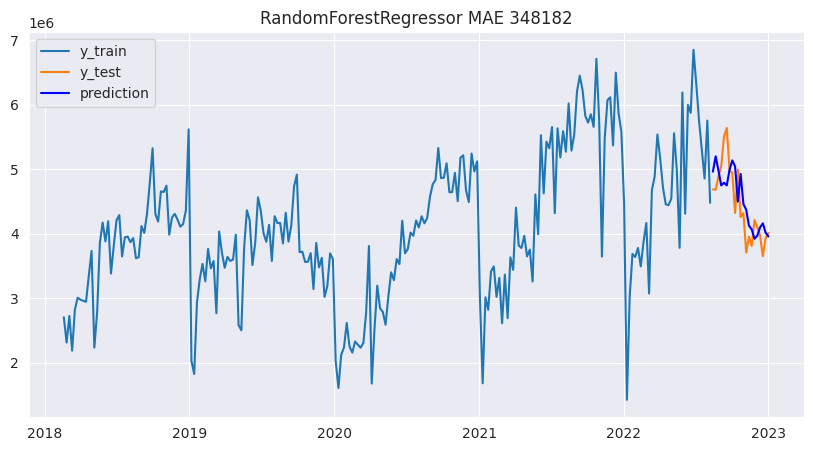

In [31]:
plt.figure(figsize=(10,5))
plt.plot(y_train, label='y_train')
plt.plot(df_rf_best['y'], label='y_test')
plt.plot(df_rf_best['prediction'], color='b', label='prediction')
    
error = mean_absolute_error(df_rf_best['prediction'], df_rf_best['y'])
plt.title("RandomForestRegressor MAE {0:.0f}".format(error))
plt.legend(loc="best")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
# Создаем сетку параметров по результатам случайного поиска 
param_grid = { 
    'bootstrap': [True], 
    'max_depth': [80, 90, 100, 110], 
    'max_features': [2, 3], 
    'min_samples_leaf' : [3, 4, 5], 
    'min_samples_split': [8, 10, 12], 
    'n_estimators': [100, 200, 300, 1000] 
}
# Создаем модель на основе 
rf = RandomForestRegressor()
# Создание модели поиска по сетке 
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Сопоставим поиск по сетке с данными 
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 100}

#XGBoost

In [32]:
import xgboost as xgb

X_train, X_test, y_train, y_test = prepareData(df_sales, lag_start=1, lag_end=7, test_size=0.1)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

params = {
        'objective': 'reg:squarederror',
        'booster':'gblinear'
         }

trees = 1000

cv = xgb.cv(params, dtrain, metrics = ('rmse'), verbose_eval=False, nfold=10, show_stdv=False, num_boost_round=trees)

bst = xgb.train(params, dtrain, num_boost_round=cv['test-rmse-mean'].argmin())

deviation = cv.loc[cv['test-rmse-mean'].argmin()]["test-rmse-mean"]

In [33]:
prediction_test = bst.predict(dtest)

df_xgb = pd.DataFrame(data=y_test)
df_xgb['prediction'] = prediction_test
df_xgb.sample(5).round()

,y,prediction
Date,,
2022-09-11,5510110.0,4823057.0
2022-11-06,3709017.0,4334240.0
2022-10-30,4321700.0,4483608.0
2022-08-14,4689519.0,4805844.0
2022-08-21,4685013.0,4662991.0


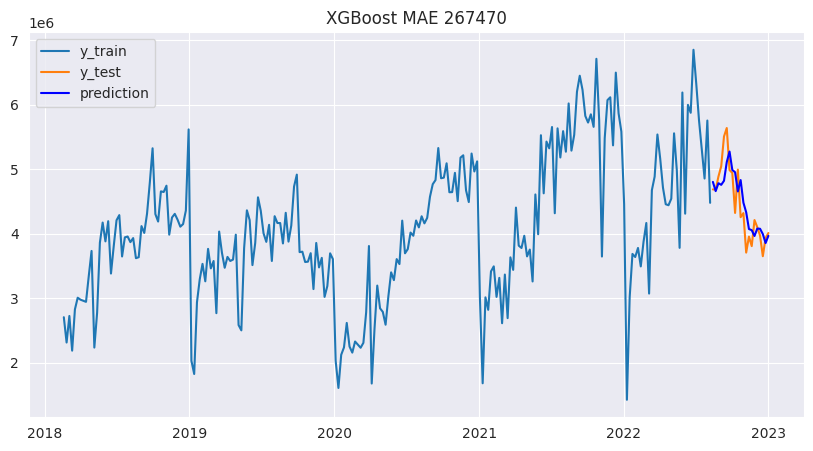

In [34]:
prediction_train = bst.predict(dtrain)
prediction_test = bst.predict(dtest)

plt.figure(figsize=(10, 5))
plt.plot(y_train, label='y_train')
plt.plot(df_xgb['y'], label='y_test')
plt.plot(df_xgb['prediction'], color='b', label='prediction')

error = mean_absolute_error(df_xgb['prediction'], df_xgb['y'])
plt.title("XGBoost MAE {0:.0f}".format(error))
plt.legend(loc="best")
plt.show()

#Нейронная сеть

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)

In [ ]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i)
        # Изменить форму данных с (history_size,) на (history_size, 1)
        data.append(np.reshape(dataset[indices], (history_size, 1)))
        labels.append(dataset[i+target_size])
    return np.array(data), np.array(labels)

In [ ]:
def create_time_steps(length):
    return list(range(-length, 0))

In [ ]:
def show_plot(plot_data, delta, title):
    labels = ['История', 'Реальное будущее значение', 'Прогноз']
    marker = ['o-', 'o', 'rx']
    time_steps = create_time_steps(plot_data[0].shape[0])
    if delta:
      future = delta
    else:
      future = 0
  
    plt.figure(figsize=(10,5))
    plt.title(title)
    for i, x in enumerate(plot_data):
      if i:
        plt.plot(future, plot_data[i], marker[i], markersize=7,
                 label=labels[i])
      else:
        plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future+5)*2])
    plt.xlabel('Временной интервал')
    return plt.show()

In [ ]:
def plot_loss(history):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], '.--', label='loss')
    plt.plot(history.history['val_loss'], 'o-', label='val_loss')
    plt.xlabel('Эпоха')
    plt.ylabel('MAE')
    plt.legend()
    plt.show()

In [ ]:
# добавляем лаги исходного ряда в качестве признаков
data = df_sales.copy()
data.columns = ["y"]
    
for i in range(1, 3):
    data["lag_{}".format(i)] = data.y.shift(i)

data = data.dropna()
print(data.shape)
data.head()

(259, 3)


,y,lag_1,lag_2
Date,,,
2018-01-21,2566781.0,1997174.0,2029539.4
2018-01-28,2894793.0,2566781.0,1997174.0
2018-02-04,3019153.0,2894793.0,2566781.0
2018-02-11,2808985.0,3019153.0,2894793.0
2018-02-18,2706368.0,2808985.0,3019153.0


In [ ]:
uni_data = data[['y']]
print(uni_data.shape)
uni_data.head()

(259, 1)


,y
Date,
2018-01-21,2566781.0
2018-01-28,2894793.0
2018-02-04,3019153.0
2018-02-11,2808985.0
2018-02-18,2706368.0


In [ ]:
uni_data = uni_data.values
print(uni_data.shape)
uni_data[:5]

(259, 1)


array([[2566781.],
       [2894793.],
       [3019153.],
       [2808985.],
       [2706368.]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
uni_data = mm.fit_transform(uni_data)
print(uni_data.shape)
uni_data[:5]

(259, 1)


array([[0.21021143],
       [0.27061214],
       [0.293512  ],
       [0.2548113 ],
       [0.23591523]])

In [ ]:
n = len(uni_data)

uni_train_mean = uni_data[:int(n*0.85)].mean()
uni_train_std = uni_data[:int(n*0.85)].std()

uni_data = (uni_data - uni_train_mean) / uni_train_std

print(uni_data.shape)
uni_data[:5]

(259, 1)


array([[-1.29558043],
       [-0.98617522],
       [-0.86886966],
       [-1.06711568],
       [-1.16391164]])

In [ ]:
n = len(uni_data)

uni_data = (uni_data * uni_train_std) + uni_train_mean

print(uni_data.shape)
uni_data[:5]

(259, 1)


array([[2566781.],
       [2894793.],
       [3019153.],
       [2808985.],
       [2706368.]])

In [ ]:
n = len(uni_data)

univariate_past_history = 28
univariate_future_target = 0

x_train, y_train = univariate_data(uni_data, 0, int(n*0.85),
                                           univariate_past_history,
                                           univariate_future_target)
x_val, y_val = univariate_data(uni_data, int(n*0.85), None,
                                       univariate_past_history,
                                       univariate_future_target)

x_train.shape, y_train.shape, x_val.shape, y_val.shape

((192, 28, 1), (192, 1), (11, 28, 1), (11, 1))

In [ ]:
print ('История:\n')
print (x_train[0])
print ('\nЦель для прогнозирования:\n')
print (y_train[0])

История:

[[0.21021143]
 [0.27061214]
 [0.293512  ]
 [0.2548113 ]
 [0.23591523]
 [0.16357477]
 [0.2394502 ]
 [0.14036389]
 [0.25830373]
 [0.29157023]
 [0.28602646]
 [0.28281226]
 [0.2797905 ]
 [0.35415338]
 [0.42526266]
 [0.14913935]
 [0.24844442]
 [0.44876339]
 [0.506297  ]
 [0.45261563]
 [0.51024942]
 [0.36066611]
 [0.43962259]
 [0.51288504]
 [0.52761491]
 [0.40945299]
 [0.46402413]
 [0.46647561]]

Цель для прогнозирования:

[0.45039507]


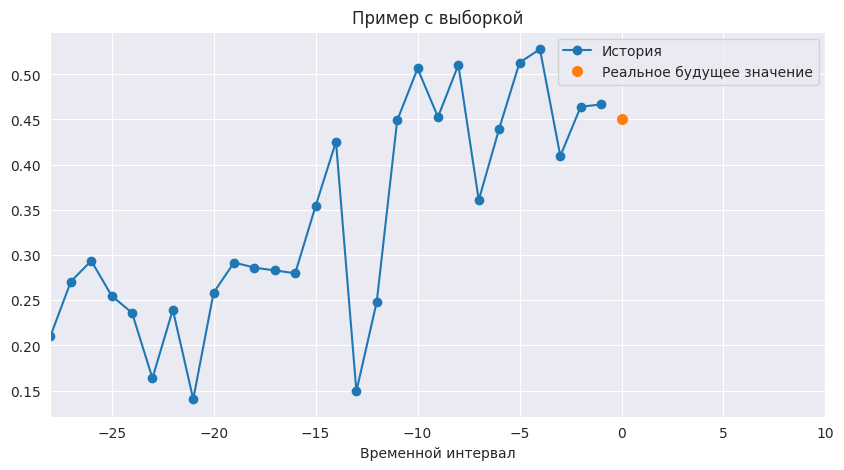

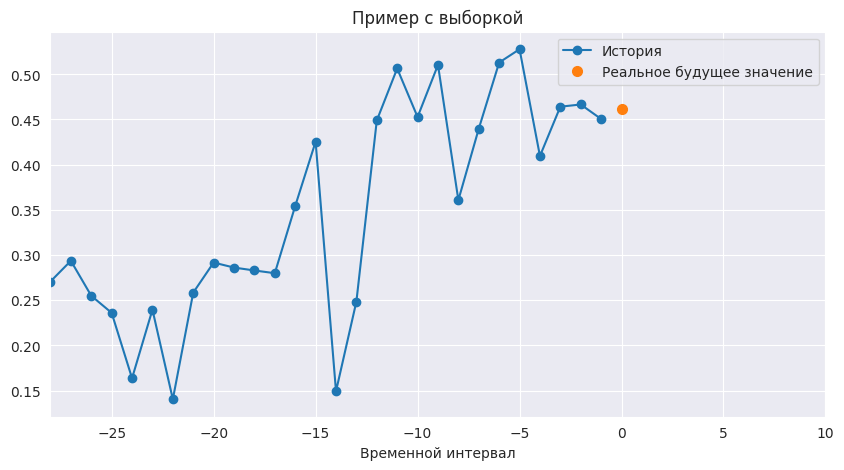

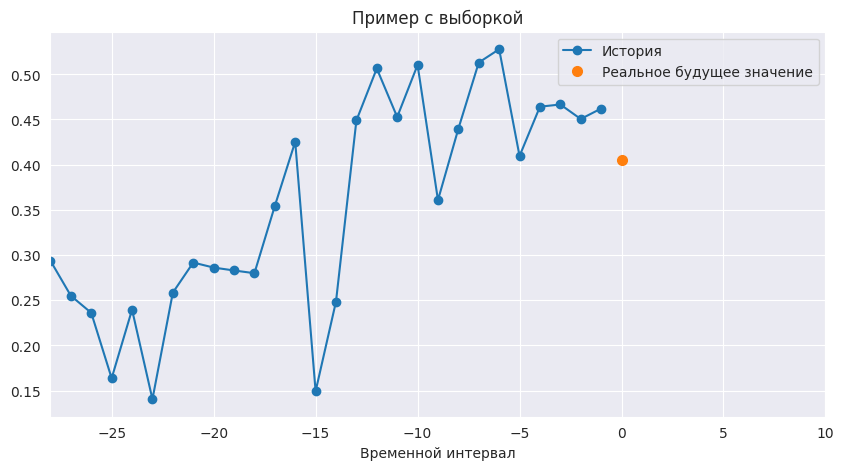

In [ ]:
for col in range(3):
    show_plot(
              [x_train[col],
               y_train[col]],
               0,
               'Пример с выборкой'
               )
plt.show()

In [ ]:
simple_lstm = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(16, input_shape=x_train.shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mean_absolute_error')
simple_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 16)                1152      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = simple_lstm.fit(x_train, 
                          y_train, 
                          epochs=16, 
                          validation_data=(x_val, y_val))

Epoch 1/16
6/6 [==============================] - 3s 123ms/step - loss: 0.3823 - val_loss: 0.0456
Epoch 2/16
6/6 [==============================] - 0s 17ms/step - loss: 0.1632 - val_loss: 0.1528
Epoch 3/16
6/6 [==============================] - 0s 18ms/step - loss: 0.1533 - val_loss: 0.0332
Epoch 4/16
6/6 [==============================] - 0s 15ms/step - loss: 0.1774 - val_loss: 0.1263
Epoch 5/16
6/6 [==============================] - 0s 14ms/step - loss: 0.1564 - val_loss: 0.1646
Epoch 6/16
6/6 [==============================] - 0s 14ms/step - loss: 0.1368 - val_loss: 0.0425
Epoch 7/16
6/6 [==============================] - 0s 15ms/step - loss: 0.1060 - val_loss: 0.0406
Epoch 8/16
6/6 [==============================] - 0s 13ms/step - loss: 0.0896 - val_loss: 0.0805
Epoch 9/16
6/6 [==============================] - 0s 13ms/step - loss: 0.0889 - val_loss: 0.0475
Epoch 10/16
6/6 [==============================] - 0s 14ms/step - loss: 0.0896 - val_loss: 0.0378
Epoch 11/16
6/6 [===========

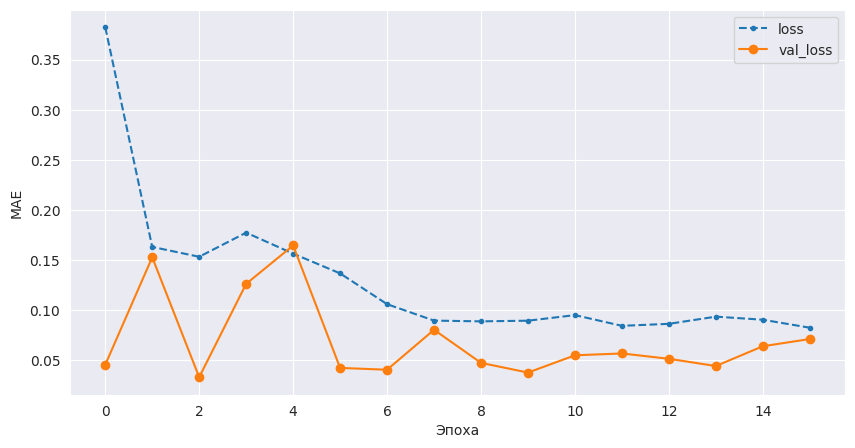

In [ ]:
plot_loss(history)

In [ ]:
y_pred_basic = simple_lstm.predict(x_val)

print(mean_absolute_error(mm.inverse_transform(y_val), mm.inverse_transform(y_pred_basic)))

1/1 [==============================] - 1s 1s/step
387081.5227272727


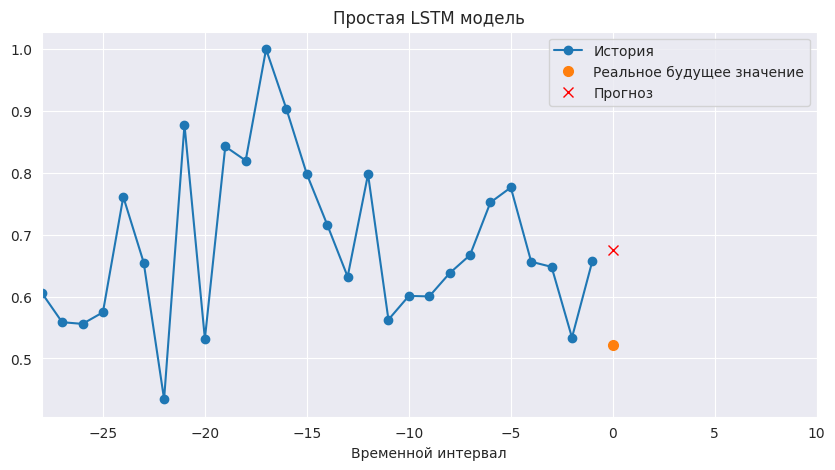

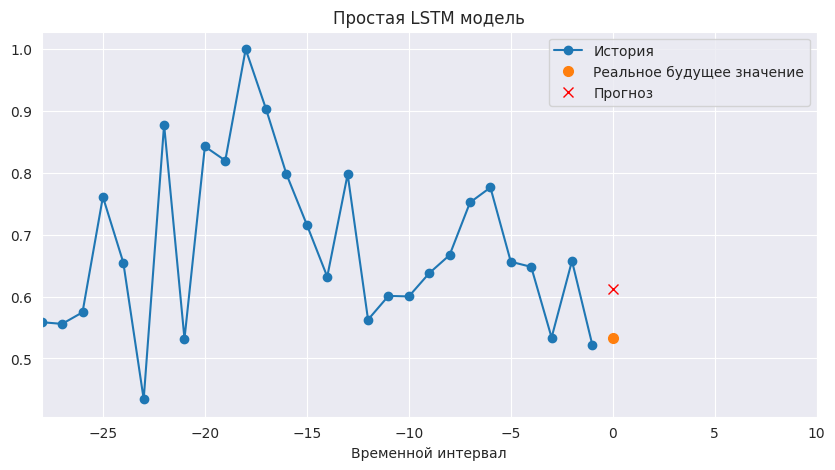

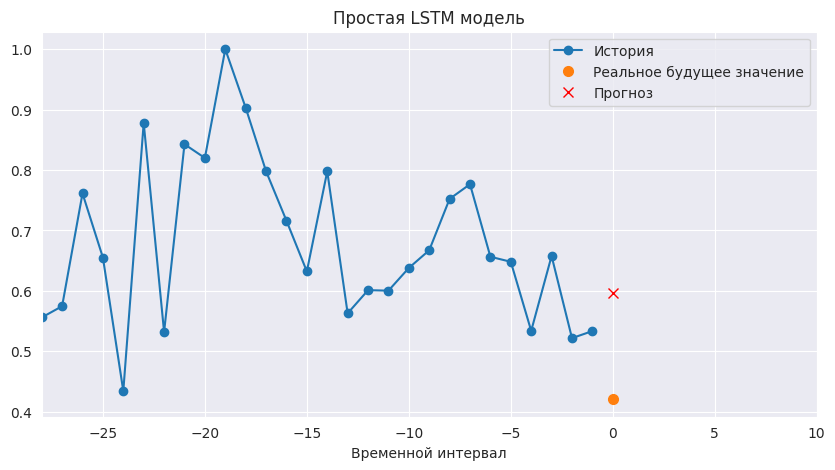

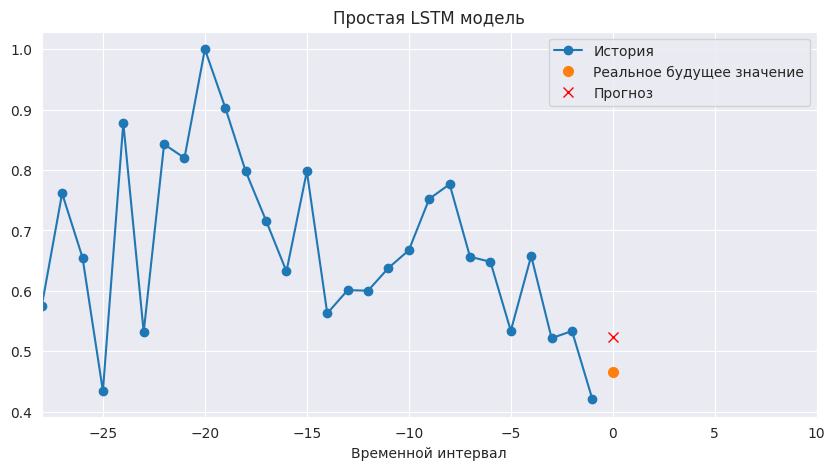

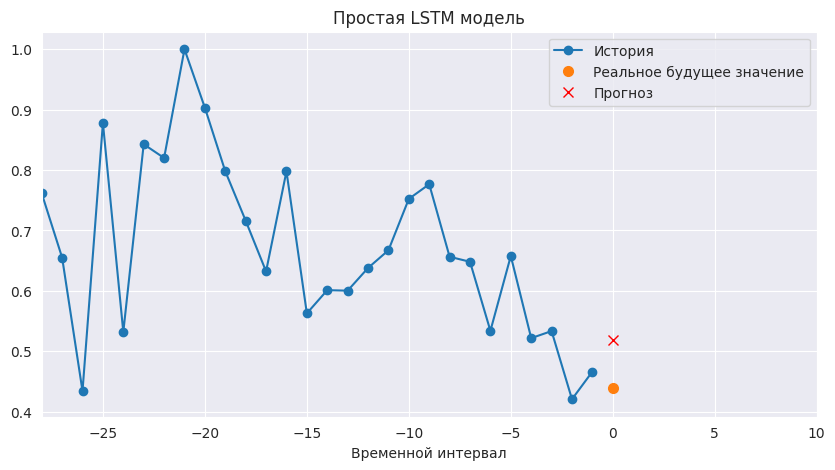

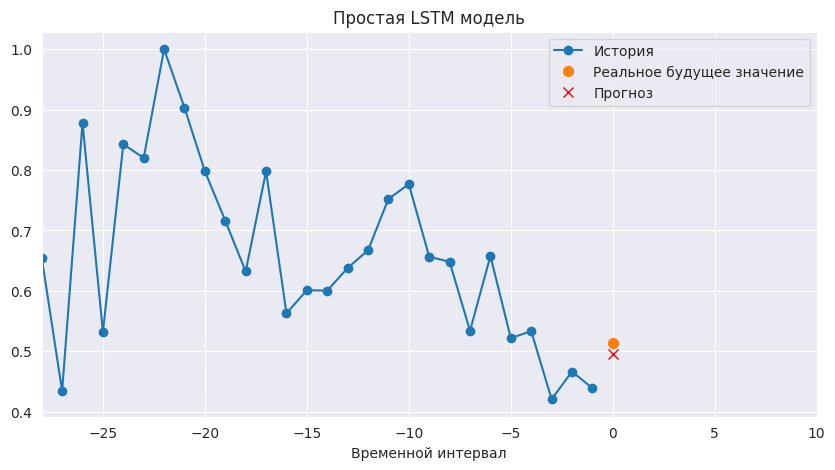

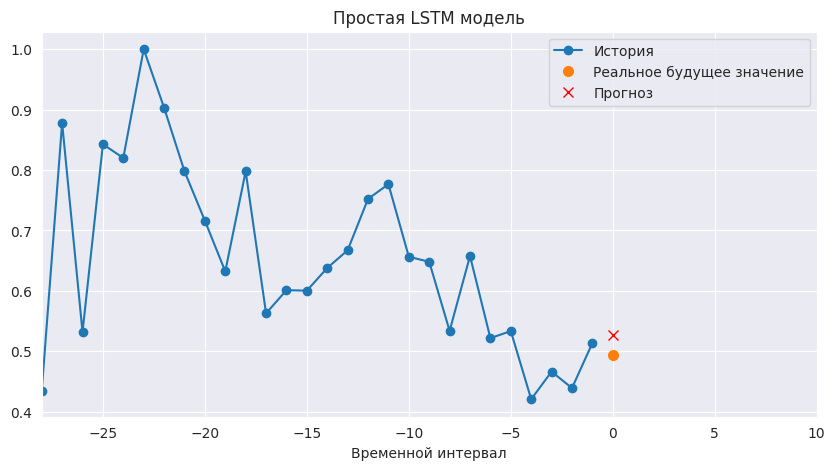

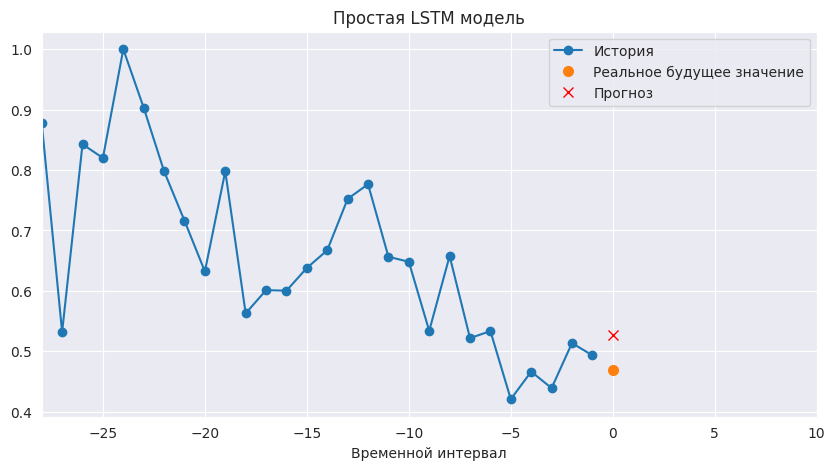

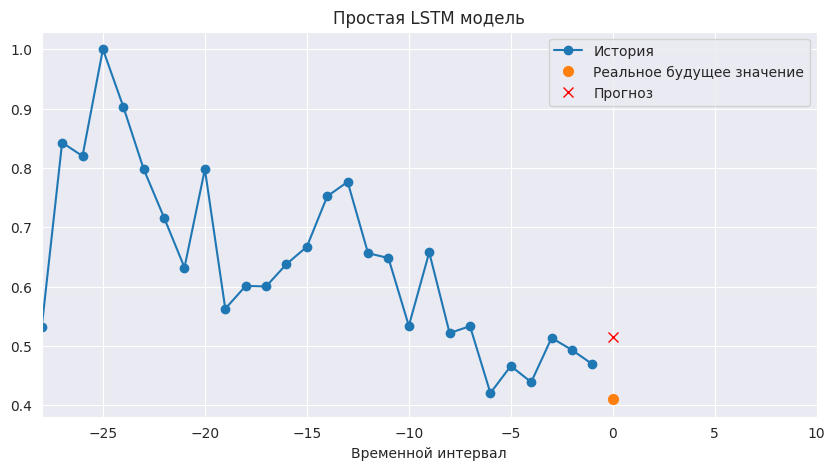

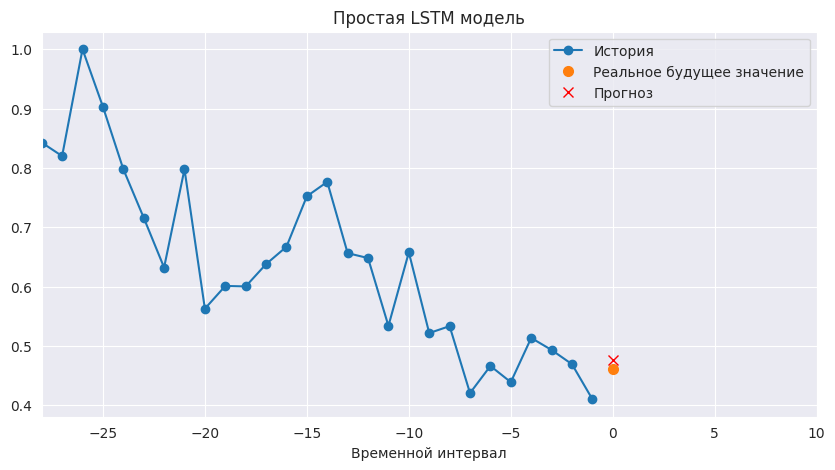

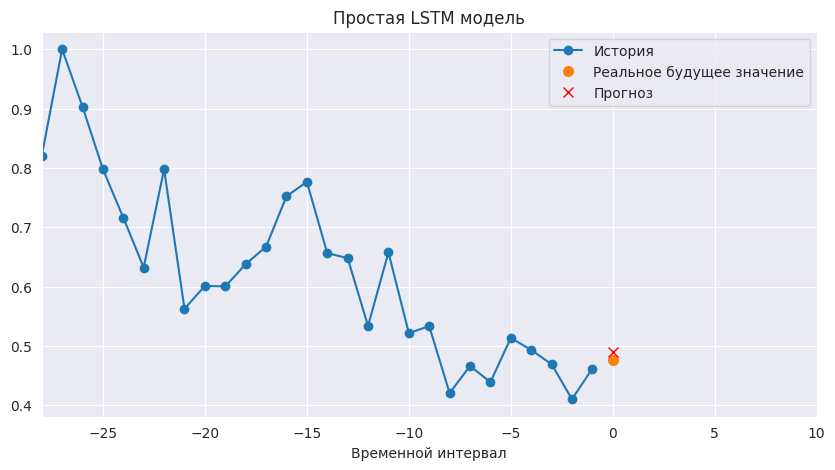

In [ ]:
for col in range(x_val.shape[0]):
    show_plot([x_val[col], 
               y_val[col], 
               y_pred_basic[col]], 
               0, 
               'Простая LSTM модель')
plt.show()

In [ ]:
# добавляем лаги исходного ряда в качестве признаков
data = df_sales.copy()
data.columns = ["y"]
    
for i in range(1, 3):
    data["lag_{}".format(i)] = data.y.shift(i)

data = data.dropna()
data.head()

,y,lag_1,lag_2
Date,,,
2018-01-21,2566781.0,1997174.0,2029539.4
2018-01-28,2894793.0,2566781.0,1997174.0
2018-02-04,3019153.0,2894793.0,2566781.0
2018-02-11,2808985.0,3019153.0,2894793.0
2018-02-18,2706368.0,2808985.0,3019153.0


In [ ]:
uni_data = data.values
print(uni_data.shape)
uni_data[:5]

(259, 3)


array([[2566781. , 1997174. , 2029539.4],
       [2894793. , 2566781. , 1997174. ],
       [3019153. , 2894793. , 2566781. ],
       [2808985. , 3019153. , 2894793. ],
       [2706368. , 2808985. , 3019153. ]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
uni_data = mm.fit_transform(uni_data)
print(uni_data.shape)
uni_data[:5]

(259, 3)


array([[0.21021143, 0.105323  , 0.11128283],
       [0.27061214, 0.21021143, 0.105323  ],
       [0.293512  , 0.27061214, 0.21021143],
       [0.2548113 , 0.293512  , 0.27061214],
       [0.23591523, 0.2548113 , 0.293512  ]])

In [ ]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

In [ ]:
n = len(uni_data)

past_history = 24
future_target = 4
STEP = 1

x_train_single, y_train_single = multivariate_data(uni_data, uni_data[:, 0], 0,
                                                   int(n*0.85), past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(uni_data, uni_data[:, 0],
                                               int(n*0.85), None, past_history,
                                               future_target, STEP,
                                               single_step=True)

x_train_single.shape, y_train_single.shape, x_val_single.shape, y_val_single.shape

((196, 24, 3), (196,), (11, 24, 3), (11,))

In [ ]:
print ('История:\n')
print (x_train_single[0])
print ('\nЦель для прогноза:\n')
print (y_train_single[0])

История:

[[0.21021143 0.105323   0.11128283]
 [0.27061214 0.21021143 0.105323  ]
 [0.293512   0.27061214 0.21021143]
 [0.2548113  0.293512   0.27061214]
 [0.23591523 0.2548113  0.293512  ]
 [0.16357477 0.23591523 0.2548113 ]
 [0.2394502  0.16357477 0.23591523]
 [0.14036389 0.2394502  0.16357477]
 [0.25830373 0.14036389 0.2394502 ]
 [0.29157023 0.25830373 0.14036389]
 [0.28602646 0.29157023 0.25830373]
 [0.28281226 0.28602646 0.29157023]
 [0.2797905  0.28281226 0.28602646]
 [0.35415338 0.2797905  0.28281226]
 [0.42526266 0.35415338 0.2797905 ]
 [0.14913935 0.42526266 0.35415338]
 [0.24844442 0.14913935 0.42526266]
 [0.44876339 0.24844442 0.14913935]
 [0.506297   0.44876339 0.24844442]
 [0.45261563 0.506297   0.44876339]
 [0.51024942 0.45261563 0.506297  ]
 [0.36066611 0.51024942 0.45261563]
 [0.43962259 0.36066611 0.51024942]
 [0.51288504 0.43962259 0.36066611]]

Цель для прогноза:

0.45039506691619097


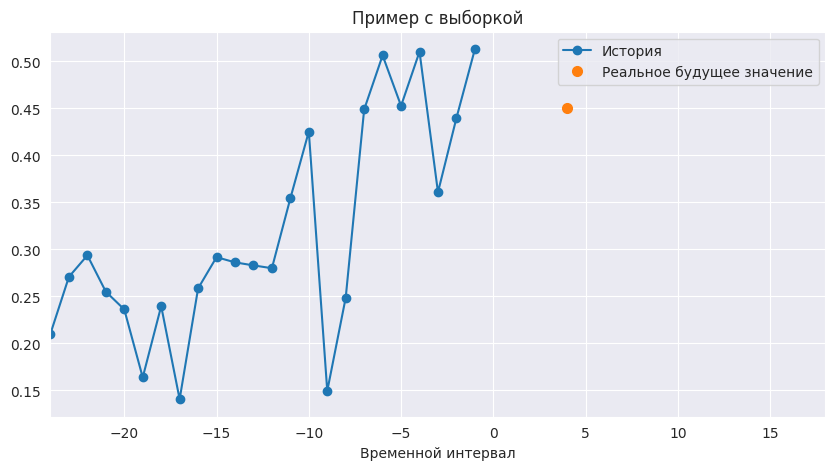

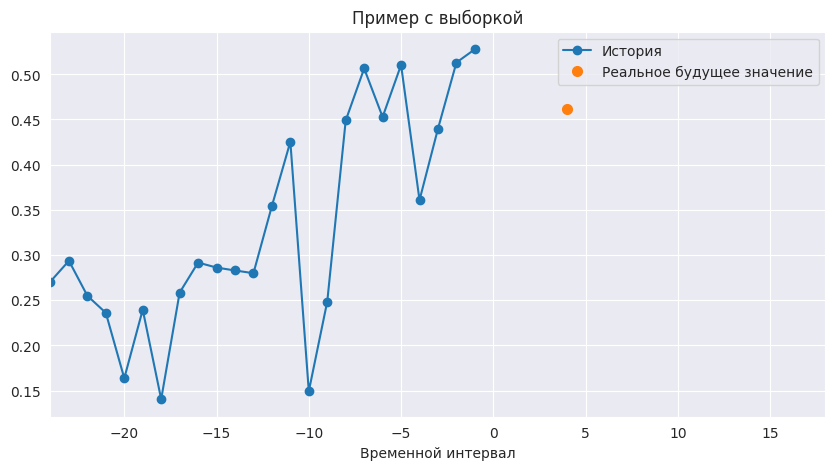

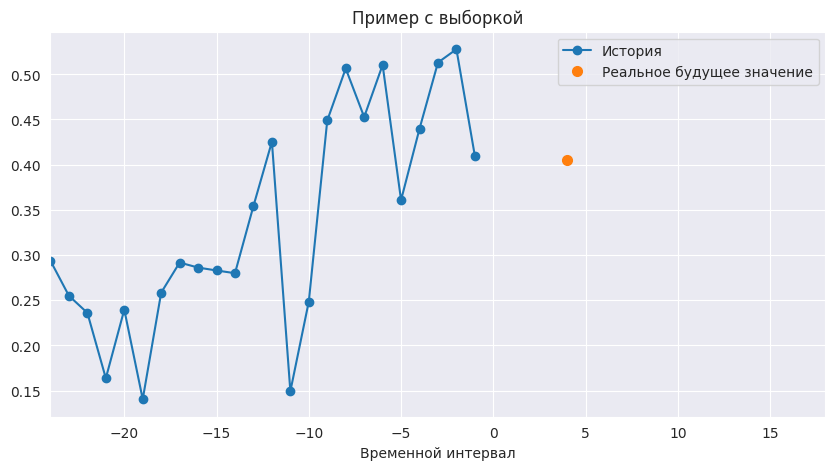

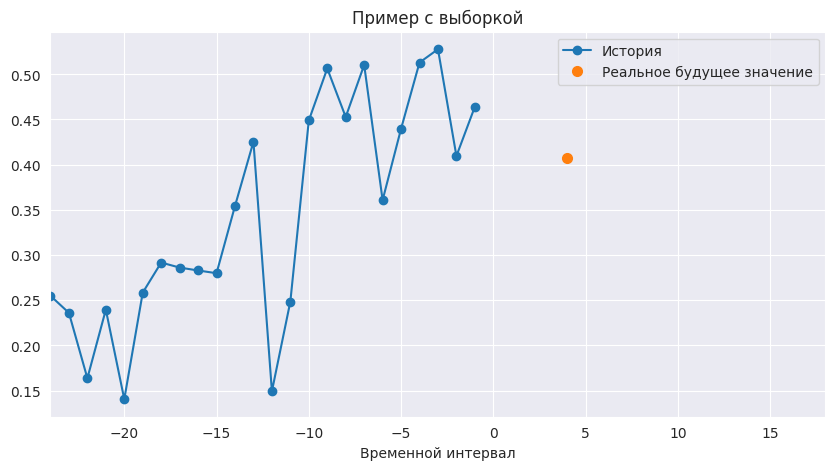

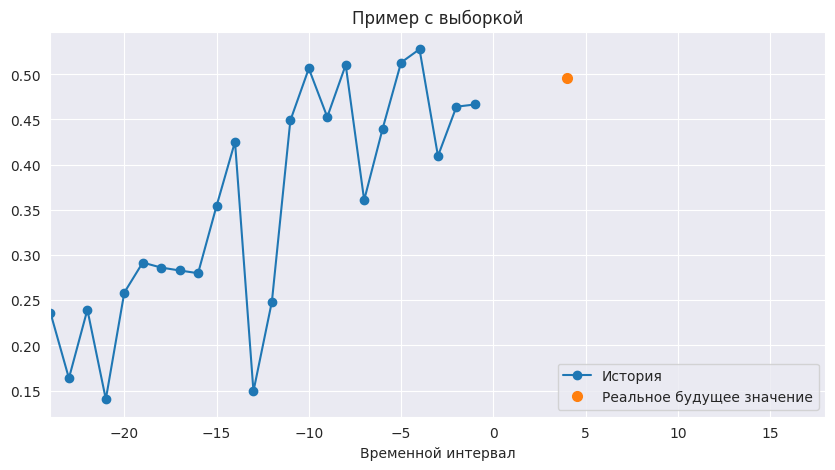

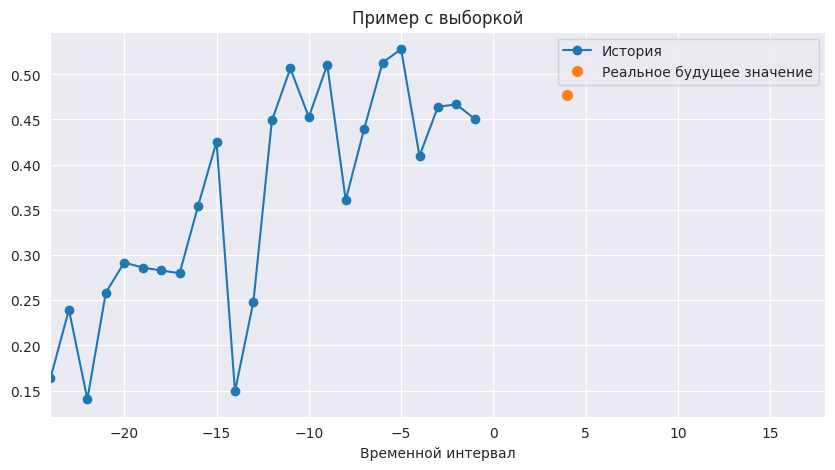

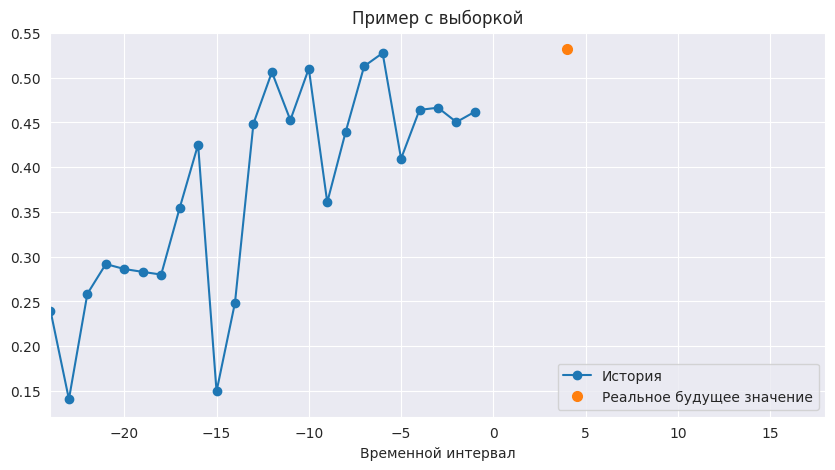

In [ ]:
for col in range(7):
    show_plot(
              [x_train_single[col][:,0],
               y_train_single[col]],
               4,
               'Пример с выборкой'
               )
plt.show()

In [ ]:
single_step_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, input_shape=x_train_single.shape[-2:]),
    tf.keras.layers.Dense(1)
])

single_step_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mean_absolute_error')
single_step_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 32)                4608      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,641
Trainable params: 4,641
Non-trainable params: 0
_________________________________________________________________


In [ ]:
single_step_history = single_step_model.fit(x_train_single,
                                            y_train_single,
                                            epochs=16,
                                            validation_data=(x_val_single, y_val_single))

Epoch 1/15
7/7 [==============================] - 3s 94ms/step - loss: 0.7949 - val_loss: 0.0686
Epoch 2/15
7/7 [==============================] - 0s 18ms/step - loss: 0.1520 - val_loss: 0.0848
Epoch 3/15
7/7 [==============================] - 0s 17ms/step - loss: 0.1689 - val_loss: 0.1162
Epoch 4/15
7/7 [==============================] - 0s 17ms/step - loss: 0.1436 - val_loss: 0.1359
Epoch 5/15
7/7 [==============================] - 0s 20ms/step - loss: 0.1383 - val_loss: 0.0921
Epoch 6/15
7/7 [==============================] - 0s 25ms/step - loss: 0.1282 - val_loss: 0.1104
Epoch 7/15
7/7 [==============================] - 0s 22ms/step - loss: 0.1216 - val_loss: 0.0939
Epoch 8/15
7/7 [==============================] - 0s 17ms/step - loss: 0.1211 - val_loss: 0.1132
Epoch 9/15
7/7 [==============================] - 0s 39ms/step - loss: 0.1192 - val_loss: 0.1386
Epoch 10/15
7/7 [==============================] - 0s 35ms/step - loss: 0.1218 - val_loss: 0.1427
Epoch 11/15
7/7 [============

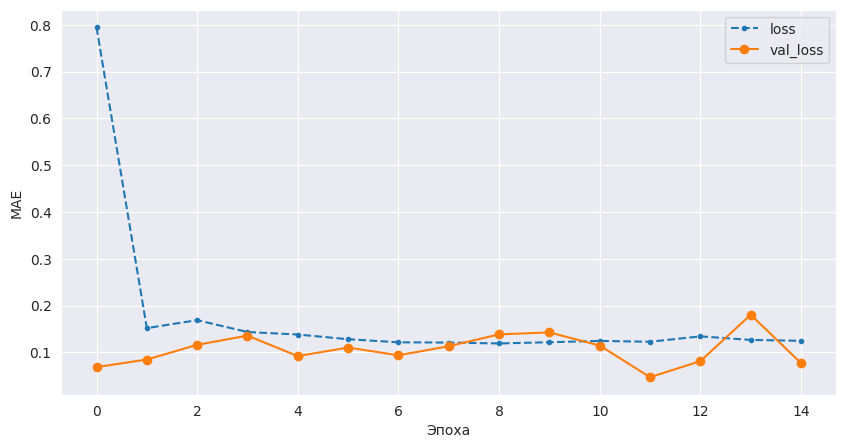

In [ ]:
plot_loss(single_step_history)

In [ ]:
y_pred_step = single_step_model.predict(x_val_single)

#print(mean_absolute_error(mm.inverse_transform(y_val_single.reshape(-1,1)), mm.inverse_transform(y_pred_step)))

1/1 [==============================] - 1s 629ms/step


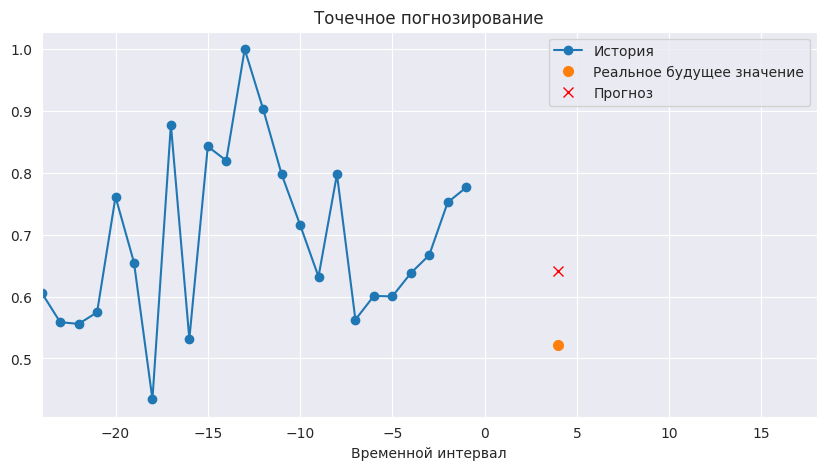

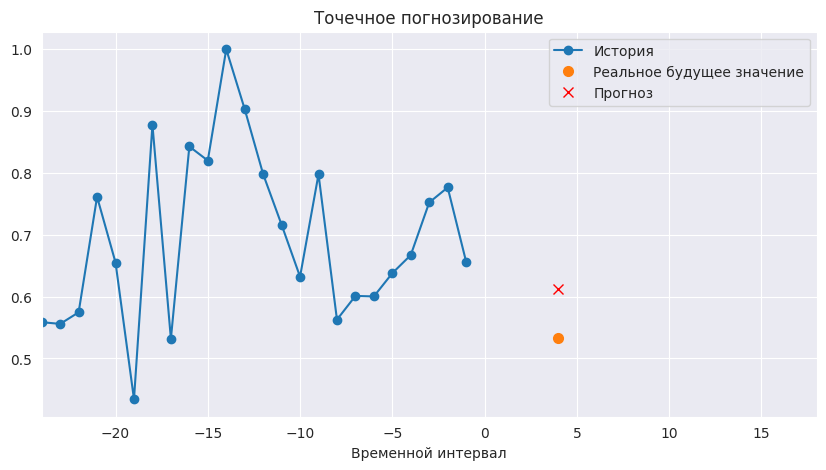

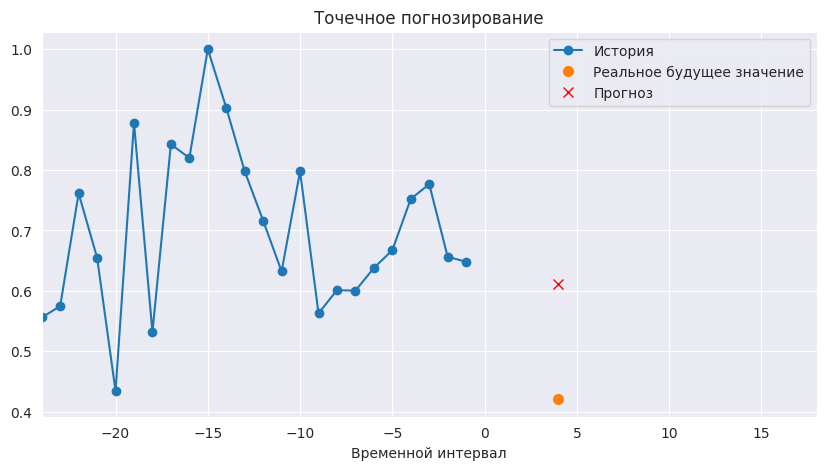

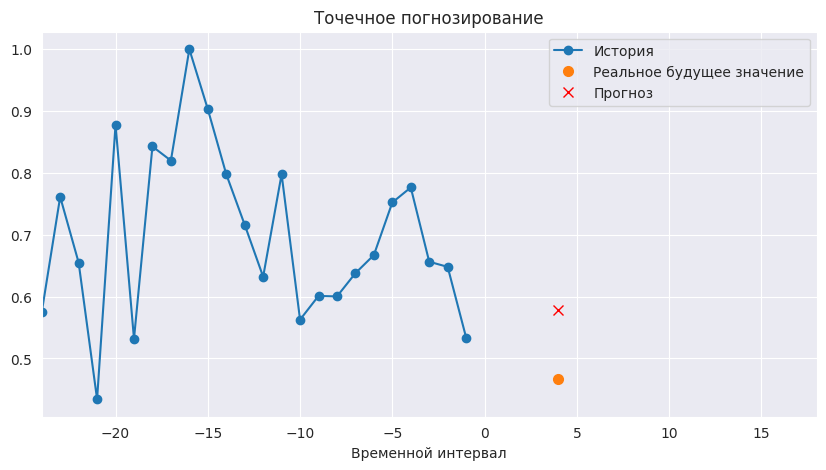

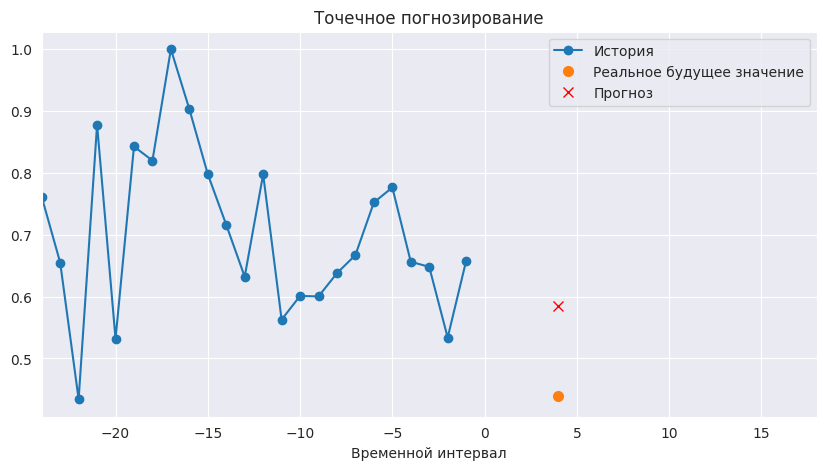

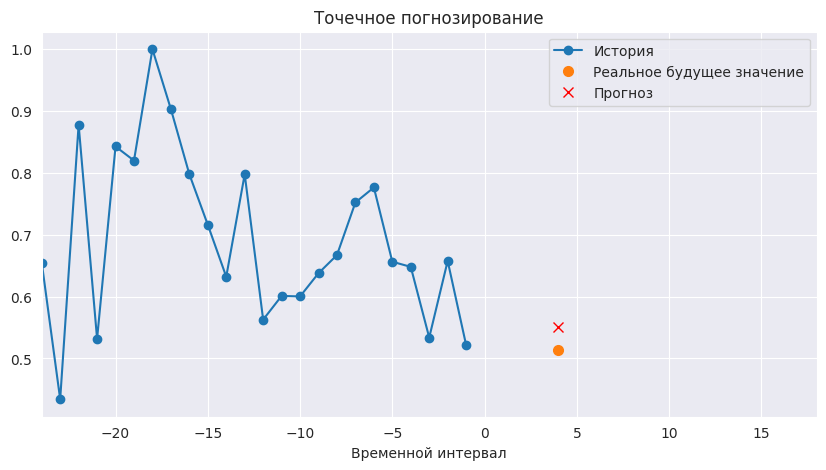

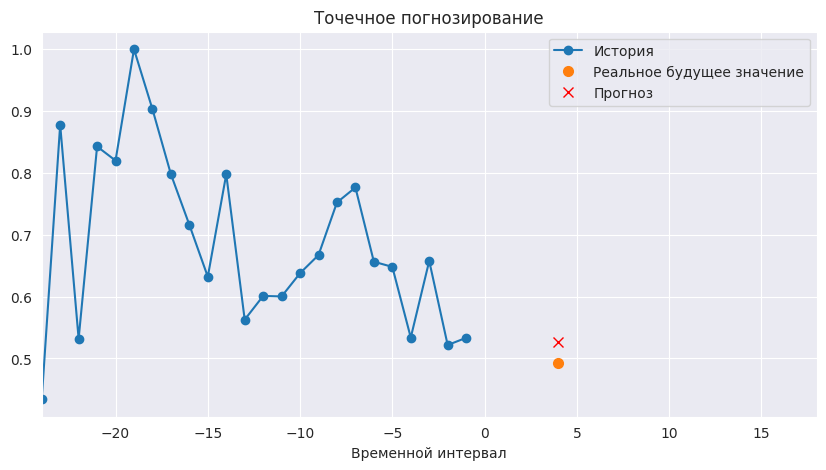

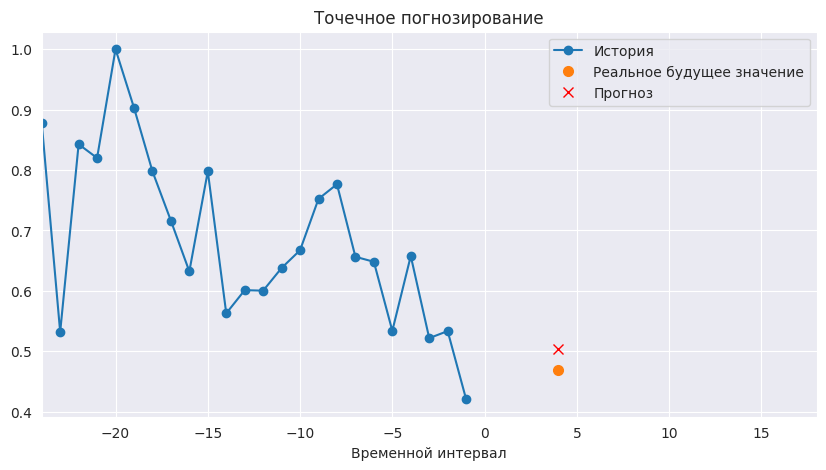

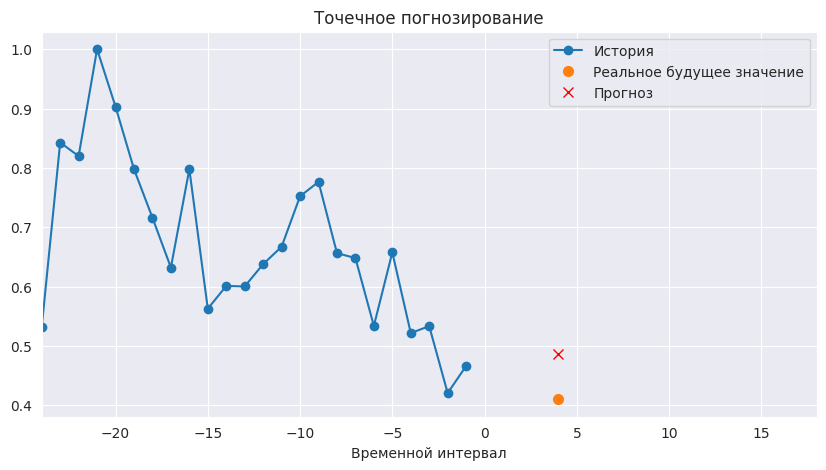

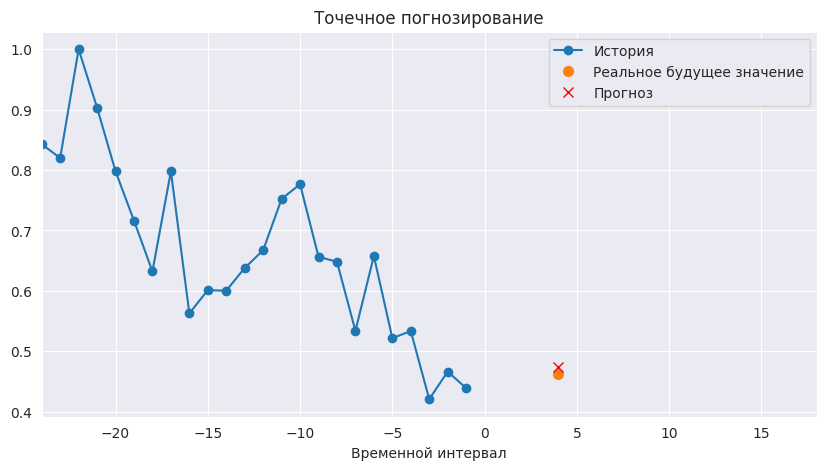

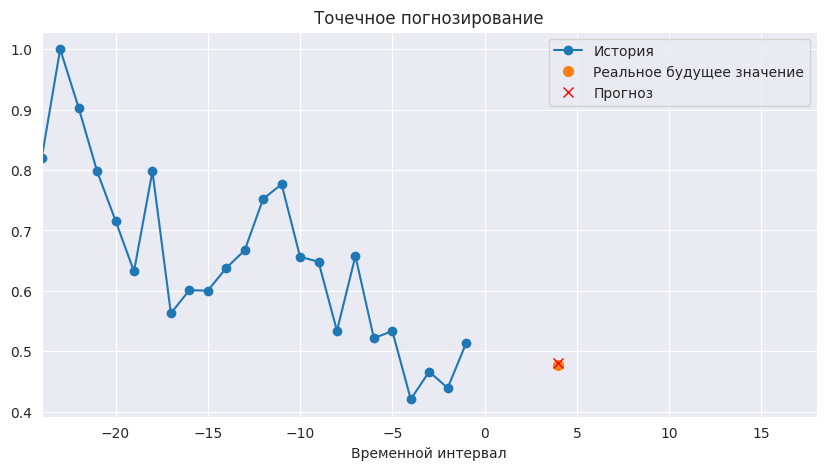

In [ ]:
for col in range(x_val_single.shape[0]):
    show_plot([x_val_single[col][:,0], 
               y_val_single[col], 
               y_pred_step[col]], 
               4, 
               'Точечное погнозирование')
plt.show()

In [ ]:
# добавляем лаги исходного ряда в качестве признаков
data = df_sales.copy()
data.columns = ["y"]
    
for i in range(1, 3):
    data["lag_{}".format(i)] = data.y.shift(i)

data = data.dropna()
data.head()

In [ ]:
uni_data = data.values
print(uni_data.shape)
uni_data[:5]

(1821, 3)


array([[0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [8., 0., 0.]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
uni_data = mm.fit_transform(uni_data)
print(uni_data.shape)
uni_data[:5]

(1821, 3)


array([[0.16363636, 0.16363636, 0.18181818],
       [0.16363636, 0.16363636, 0.16363636],
       [0.16363636, 0.16363636, 0.16363636],
       [0.16363636, 0.16363636, 0.16363636],
       [0.30909091, 0.16363636, 0.16363636]])

In [ ]:
n = len(uni_data)

past_history = 112
future_target = 14
STEP = 7

x_train_multi, y_train_multi = multivariate_data(uni_data, uni_data[:, 0], 0,
                                                 int(n*0.9), past_history,
                                                 future_target, STEP)
x_val_multi, y_val_multi = multivariate_data(uni_data, uni_data[:, 0],
                                             int(n*0.9), None, past_history,
                                             future_target, STEP)

x_train_multi.shape, y_train_multi.shape, x_val_multi.shape, y_val_multi.shape

((1526, 16, 3), (1526, 14), (57, 16, 3), (57, 14))

In [ ]:
print ('История : {}'.format(x_train_multi[0].shape))
print ('\nЦель для прогнозирования : {}'.format(y_train_multi[0].shape))

История : (16, 3)

Цель для прогнозирования : (14,)


In [ ]:
print ('История:\n')
print (x_train_multi[0])
print ('\nЦель для прогнозирования:\n')
print (y_train_multi[0])

История:

[[0.16363636 0.16363636 0.18181818]
 [0.34545455 0.18181818 0.16363636]
 [0.16363636 0.16363636 0.16363636]
 [0.16363636 0.34545455 0.25454545]
 [0.21818182 0.27272727 0.23636364]
 [0.34545455 0.2        0.23636364]
 [0.16363636 0.16363636 0.25454545]
 [0.16363636 0.16363636 0.47272727]
 [0.25454545 0.49090909 0.16363636]
 [0.16363636 0.16363636 0.18181818]
 [0.38181818 0.34545455 0.34545455]
 [0.4        0.25454545 0.30909091]
 [0.18181818 0.18181818 0.38181818]
 [0.16363636 0.27272727 0.16363636]
 [0.4        0.58181818 0.50909091]
 [0.16363636 0.23636364 0.25454545]]

Цель для прогнозирования:

[0.43636364 0.2        0.21818182 0.2        0.16363636 0.2
 0.27272727 0.52727273 0.27272727 0.23636364 0.18181818 0.34545455
 0.16363636 0.18181818]


In [ ]:
def multi_step_plot(history, true_future, prediction):
  plt.figure(figsize=(12, 6))
  num_in = create_time_steps(len(history))
  num_out = len(true_future)

  plt.plot(num_in, np.array(history[:, 1]), 'o-', label='История')
  plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'o-', label='Реальные будущие значения')
  if prediction.any():
    plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'o-', color='b', label='Прогноз')
  plt.legend(loc='best')
  plt.show()

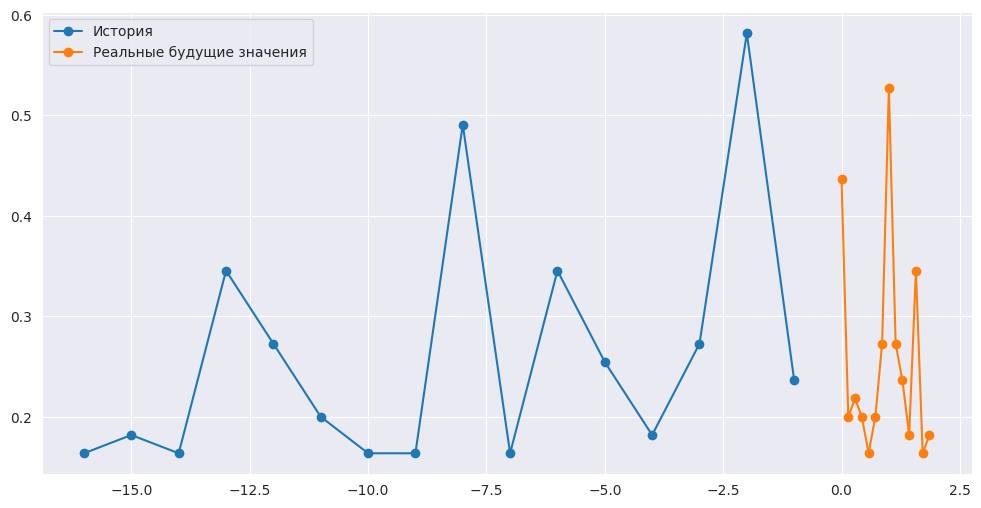

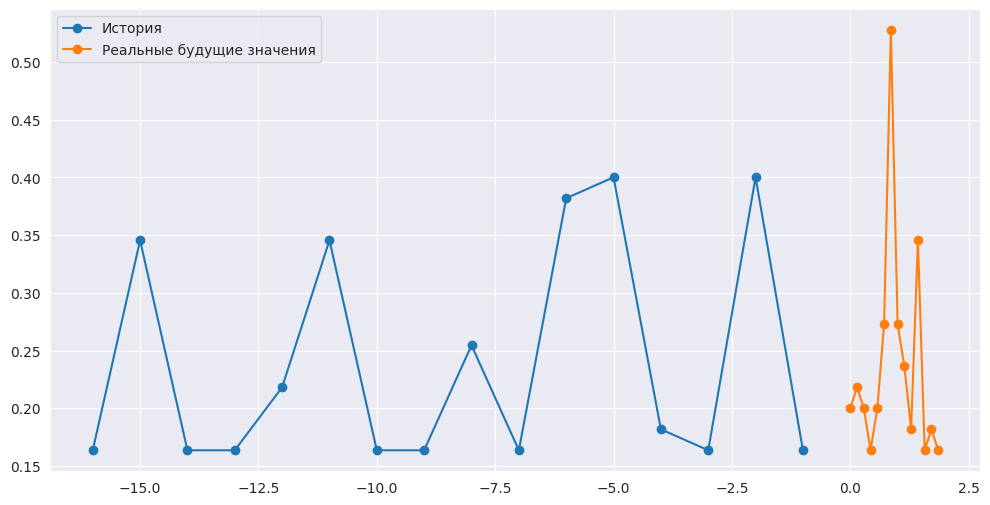

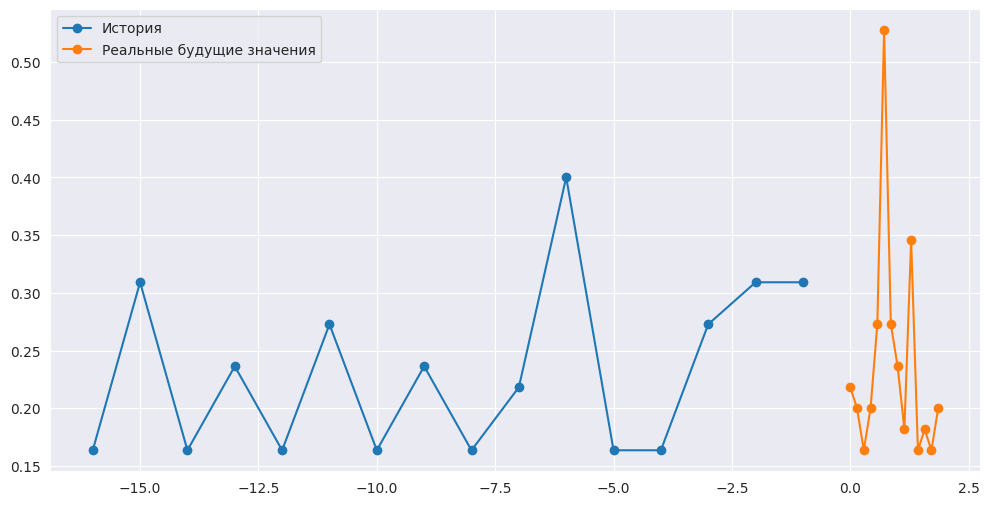

In [ ]:
for col in range(3):
    multi_step_plot(x_train_multi[col], 
                    y_train_multi[col], 
                    np.array([0]), 
)
plt.show()

In [ ]:
multi_step_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32,  
                         return_sequences=True, 
                         input_shape=x_train_multi.shape[-2:]
                         ),

    tf.keras.layers.LSTM(16, 
                         activation='softmax'
                         ),

    tf.keras.layers.Dense(future_target)
])

multi_step_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss='mean_absolute_error')
multi_step_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 16, 32)            4608      
                                                                 
 lstm_15 (LSTM)              (None, 16)                3136      
                                                                 
 dense_8 (Dense)             (None, 14)                238       
                                                                 
Total params: 7,982
Trainable params: 7,982
Non-trainable params: 0
_________________________________________________________________


In [ ]:
multi_step_history = multi_step_model.fit(x_train_multi,
                                          y_train_multi, 
                                          epochs=16,
                                          validation_data=(x_val_multi, y_val_multi))

Epoch 1/16
48/48 [==============================] - 6s 45ms/step - loss: 0.1151 - val_loss: 0.1035
Epoch 2/16
48/48 [==============================] - 1s 26ms/step - loss: 0.0916 - val_loss: 0.1036
Epoch 3/16
48/48 [==============================] - 1s 24ms/step - loss: 0.0916 - val_loss: 0.1034
Epoch 4/16
48/48 [==============================] - 1s 17ms/step - loss: 0.0915 - val_loss: 0.1035
Epoch 5/16
48/48 [==============================] - 1s 16ms/step - loss: 0.0916 - val_loss: 0.1038
Epoch 6/16
48/48 [==============================] - 1s 16ms/step - loss: 0.0917 - val_loss: 0.1038
Epoch 7/16
48/48 [==============================] - 1s 17ms/step - loss: 0.0916 - val_loss: 0.1036
Epoch 8/16
48/48 [==============================] - 1s 17ms/step - loss: 0.0916 - val_loss: 0.1035
Epoch 9/16
48/48 [==============================] - 1s 16ms/step - loss: 0.0916 - val_loss: 0.1038
Epoch 10/16
48/48 [==============================] - 1s 19ms/step - loss: 0.0917 - val_loss: 0.1035
Epoch 11/

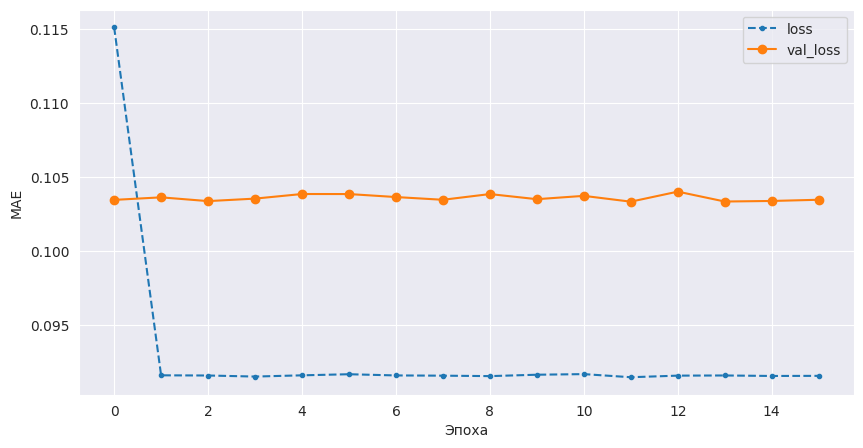

In [ ]:
plot_loss(multi_step_history)

In [ ]:
y_pred_multi = multi_step_model.predict(x_val_multi)

for col in range(y_val_multi.shape[0]):
    multi_step_plot(x_val_multi[col], 
                    y_val_multi[col], 
                    y_pred_multi[col], 
)
plt.show()